In [954]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#fix parameters 
RANDOMSEED = 42
MIN = 20
K = 10
DATAPATH = "groceries.csv"
rng = np.random.default_rng(RANDOMSEED)

In [955]:
#load data & eda analysis
data = pd.read_csv(DATAPATH, header = None)

In [956]:
data.head()

0                    1               2  \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt   cream cheese    
4  other vegetables           whole milk  condensed milk   

                          3  
0               ready soups  
1                       NaN  
2                       NaN  
3              meat spreads  
4  long life bakery product

In [957]:
data.describe()

0           1     2              3
count         4472        2820  1562            669
unique         144         132   128             96
top     whole milk  rolls/buns  soda  shopping bags
freq           481         221   115             81

In [958]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472 entries, 0 to 4471
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4472 non-null   object
 1   1       2820 non-null   object
 2   2       1562 non-null   object
 3   3       669 non-null    object
dtypes: object(4)
memory usage: 139.9+ KB


In [959]:
print(' \nSchema: Columns are non-ordered items from a single transaction list(a row)\n        Data types are all objects\n        Sample Values: whole milk, shopping bags, soda, rolls/buns\n        Each row represents one transaction list\n'
)

 
Schema: Columns are non-ordered items from a single transaction list(a row)
        Data types are all objects
        Sample Values: whole milk, shopping bags, soda, rolls/buns
        Each row represents one transaction list



In [960]:
#renaming
data["item_1"] = data[0]
data["item_2"] = data[1]
data["item_3"] = data[2]
data["item_4"] = data[3]
data.drop(columns = 0, inplace = True)
data.drop(columns = 1, inplace = True)
data.drop(columns = 2, inplace = True)
data.drop(columns = 3, inplace = True)

In [961]:
data

item_1                    item_2               item_3  \
0          citrus fruit       semi-finished bread            margarine   
1        tropical fruit                    yogurt               coffee   
2            whole milk                       NaN                  NaN   
3             pip fruit                    yogurt        cream cheese    
4      other vegetables                whole milk       condensed milk   
...                 ...                       ...                  ...   
4467       frozen meals                       NaN                  NaN   
4468         newspapers                       NaN                  NaN   
4469             yogurt  long life bakery product                  NaN   
4470          ice cream  long life bakery product  specialty chocolate   
4471  cooking chocolate                       NaN                  NaN   

                        item_4  
0                  ready soups  
1                          NaN  
2                          NaN  
3                 meat spreads  
4     long life bakery product  
...                        ...  
4467                       NaN  
4468                       NaN  
4469                       NaN  
4470             specialty bar  
4471                       NaN  

[4472 rows x 4 columns]

In [962]:
# sorting rows to enable better aggregation 
def sort_row(row):
    vals = [x for x in row if pd.notna(x)]
    vals = sorted(vals, key=lambda s: s.lower())
    vals += [pd.NA] * (len(row) - len(vals))
    return pd.Series(vals, index=row.index)

data = data.apply(sort_row, axis=1)


In [963]:
data

item_1                    item_2            item_3  \
0                 citrus fruit                 margarine       ready soups   
1                       coffee            tropical fruit            yogurt   
2                   whole milk                      <NA>              <NA>   
3                cream cheese               meat spreads         pip fruit   
4               condensed milk  long life bakery product  other vegetables   
...                        ...                       ...               ...   
4467              frozen meals                      <NA>              <NA>   
4468                newspapers                      <NA>              <NA>   
4469  long life bakery product                    yogurt              <NA>   
4470                 ice cream  long life bakery product     specialty bar   
4471         cooking chocolate                      <NA>              <NA>   

                   item_4  
0     semi-finished bread  
1                    <NA>  
2                    <NA>  
3                  yogurt  
4              whole milk  
...                   ...  
4467                 <NA>  
4468                 <NA>  
4469                 <NA>  
4470  specialty chocolate  
4471                 <NA>  

[4472 rows x 4 columns]

In [964]:
#slightly cleaned schema
dic = {"Columns":"item_1, item_2, item_3, item_4", "Types": "Objects", "Meaning": "Four items on the transaction list"}
dic

{'Columns': 'item_1, item_2, item_3, item_4',
 'Types': 'Objects',
 'Meaning': 'Four items on the transaction list'}

In [965]:
#create a whole item list
items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)

/var/folders/11/lpg0vvp502x5n18lyjj0251r0000gp/T/ipykernel_55990/3831778344.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)


In [966]:
#further eda
transaction_num = len(data)
print(f"There are {transaction_num} transactions")

There are 4472 transactions


In [967]:
num_unique = items.nunique()
print(f"There are {num_unique} unique products")

There are 151 unique products


In [968]:
basket_sizes = data.filter(like="item").notna().sum(axis=1)
print(f"The min basket size is {basket_sizes.min()}")
print(f"The median basket size is {basket_sizes.median()}")
print(f"The 95th percentile of the basket size is {basket_sizes.quantile(0.95)}")

The min basket size is 1
The median basket size is 2.0
The 95th percentile of the basket size is 4.0


In [969]:
#counting most freq items
t_min = items.value_counts().head(MIN)
t_min

items
whole milk               726
soda                     616
rolls/buns               589
other vegetables         421
yogurt                   339
bottled water            301
pastry                   258
newspapers               240
tropical fruit           211
shopping bags            207
citrus fruit             187
root vegetables          184
coffee                   177
pip fruit                162
fruit/vegetable juice    158
brown bread              153
whipped/sour cream       149
frankfurter              144
chocolate                138
specialty chocolate      124
Name: count, dtype: int64

In [970]:
#use re to deal with strings and standardize item names
import re

def standardize_item(x):
    if isinstance(x, str):
        x = x.strip().lower()
        return re.sub(r"\s+", "_", x)
    return x

data = data.applymap(standardize_item)


/var/folders/11/lpg0vvp502x5n18lyjj0251r0000gp/T/ipykernel_55990/355376617.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(standardize_item)


In [971]:
#check 
data

item_1                    item_2            item_3  \
0                 citrus_fruit                 margarine       ready_soups   
1                       coffee            tropical_fruit            yogurt   
2                   whole_milk                      <NA>              <NA>   
3                 cream_cheese              meat_spreads         pip_fruit   
4               condensed_milk  long_life_bakery_product  other_vegetables   
...                        ...                       ...               ...   
4467              frozen_meals                      <NA>              <NA>   
4468                newspapers                      <NA>              <NA>   
4469  long_life_bakery_product                    yogurt              <NA>   
4470                 ice_cream  long_life_bakery_product     specialty_bar   
4471         cooking_chocolate                      <NA>              <NA>   

                   item_4  
0     semi-finished_bread  
1                    <NA>  
2                    <NA>  
3                  yogurt  
4              whole_milk  
...                   ...  
4467                 <NA>  
4468                 <NA>  
4469                 <NA>  
4470  specialty_chocolate  
4471                 <NA>  

[4472 rows x 4 columns]

In [972]:
#put the new col back
data = data.assign(basket_size = basket_sizes)

In [973]:
#check for empty basketes 
zero_cols = data['basket_size'] == 0
zero_cols.sum()

np.int64(0)

In [974]:
#drop baskets containig less than 2 items
data = data.drop(data.loc[data['basket_size'] < 2].index).reset_index(drop=True)

In [975]:
basket_size = data["basket_size"]

In [976]:
data

item_1                    item_2            item_3  \
0                 citrus_fruit                 margarine       ready_soups   
1                       coffee            tropical_fruit            yogurt   
2                 cream_cheese              meat_spreads         pip_fruit   
3               condensed_milk  long_life_bakery_product  other_vegetables   
4                      cereals                whole_milk              <NA>   
...                        ...                       ...               ...   
2815                newspapers                    pastry              <NA>   
2816             bottled_water                      curd        whole_milk   
2817             bottled_water              frozen_meals        whole_milk   
2818  long_life_bakery_product                    yogurt              <NA>   
2819                 ice_cream  long_life_bakery_product     specialty_bar   

                   item_4  basket_size  
0     semi-finished_bread            4  
1                    <NA>            3  
2                  yogurt            4  
3              whole_milk            4  
4                    <NA>            2  
...                   ...          ...  
2815                 <NA>            2  
2816                 <NA>            3  
2817               yogurt            4  
2818                 <NA>            2  
2819  specialty_chocolate            4  

[2820 rows x 5 columns]

In [977]:
#create items series that store the items list
items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)

/var/folders/11/lpg0vvp502x5n18lyjj0251r0000gp/T/ipykernel_55990/1240977314.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  items = data.filter(like = "item").stack(dropna = True).rename("items").reset_index(level=1, drop = True)


In [978]:
#reform items into a new transaction data frame
transactions = items.groupby(level=0).apply(list).rename("items").reset_index()

In [979]:
#apply id
transactions.rename(columns = {"index":"transaction_id"}, inplace = True)

In [980]:
#add basket_size from data 
transactions['basket_size'] = basket_size

In [981]:
transactions

transaction_id                                              items  \
0                  0  [citrus_fruit, margarine, ready_soups, semi-fi...   
1                  1                   [coffee, tropical_fruit, yogurt]   
2                  2    [cream_cheese, meat_spreads, pip_fruit, yogurt]   
3                  3  [condensed_milk, long_life_bakery_product, oth...   
4                  4                              [cereals, whole_milk]   
...              ...                                                ...   
2815            2815                               [newspapers, pastry]   
2816            2816                  [bottled_water, curd, whole_milk]   
2817            2817  [bottled_water, frozen_meals, whole_milk, yogurt]   
2818            2818                 [long_life_bakery_product, yogurt]   
2819            2819  [ice_cream, long_life_bakery_product, specialt...   

      basket_size  
0               4  
1               3  
2               4  
3               4  
4               2  
...           ...  
2815            2  
2816            3  
2817            4  
2818            2  
2819            4  

[2820 rows x 3 columns]

In [982]:
#store according to requirements
transactions.to_parquet("outputs/transactions_clean.parquet")

In [983]:
#count unique
uni = pd.unique(data.drop(columns='basket_size').values.ravel())
uni = [x for x in uni if pd.notna(x)]
len(uni)

146

In [984]:
#create price map
price_dic = {}
for i in uni:
    price_dic[i] = round(rng.uniform(0.5, 15.0),2)

In [985]:
#convert to series
prices = pd.Series(price_dic).rename_axis("product").reset_index(name="price")

In [986]:
prices

product  price
0           citrus_fruit  11.72
1              margarine   6.86
2            ready_soups  12.95
3    semi-finished_bread  10.61
4                 coffee   1.87
..                   ...    ...
141                cream   7.62
142           hair_spray  14.10
143                 soap   8.79
144       kitchen_towels   7.37
145      make_up_remover   4.37

[146 rows x 2 columns]

In [987]:
#store price map
prices.to_csv("outputs/product_prices.csv ")

In [988]:
# create price 
for col in ["item_1", "item_2", "item_3", "item_4"]:
    data[f"{col}_price"] = data[col].map(price_dic)

In [989]:
# calculate total price
data["basket_total"] = data[[f"{c}_price" for c in ["item_1", "item_2", "item_3", "item_4"]]].sum(axis=1, skipna=True)

In [990]:
#apply changes to transactions for submission
transactions['basket_total'] = data['basket_total']
transactions

transaction_id                                              items  \
0                  0  [citrus_fruit, margarine, ready_soups, semi-fi...   
1                  1                   [coffee, tropical_fruit, yogurt]   
2                  2    [cream_cheese, meat_spreads, pip_fruit, yogurt]   
3                  3  [condensed_milk, long_life_bakery_product, oth...   
4                  4                              [cereals, whole_milk]   
...              ...                                                ...   
2815            2815                               [newspapers, pastry]   
2816            2816                  [bottled_water, curd, whole_milk]   
2817            2817  [bottled_water, frozen_meals, whole_milk, yogurt]   
2818            2818                 [long_life_bakery_product, yogurt]   
2819            2819  [ice_cream, long_life_bakery_product, specialt...   

      basket_size  basket_total  
0               4         42.14  
1               3         28.06  
2               4         32.83  
3               4         42.09  
4               2         19.36  
...           ...           ...  
2815            2         17.43  
2816            3         22.95  
2817            4         38.64  
2818            2         25.48  
2819            4         22.19  

[2820 rows x 4 columns]

In [991]:
#Output
transactions.to_csv('outputs/transactions_priced.csv')

In [992]:
#Checkpoint
data

item_1                    item_2            item_3  \
0                 citrus_fruit                 margarine       ready_soups   
1                       coffee            tropical_fruit            yogurt   
2                 cream_cheese              meat_spreads         pip_fruit   
3               condensed_milk  long_life_bakery_product  other_vegetables   
4                      cereals                whole_milk              <NA>   
...                        ...                       ...               ...   
2815                newspapers                    pastry              <NA>   
2816             bottled_water                      curd        whole_milk   
2817             bottled_water              frozen_meals        whole_milk   
2818  long_life_bakery_product                    yogurt              <NA>   
2819                 ice_cream  long_life_bakery_product     specialty_bar   

                   item_4  basket_size  item_1_price  item_2_price  \
0     semi-finished_bread            4         11.72          6.86   
1                    <NA>            3          1.87         14.65   
2                  yogurt            4         11.90          2.36   
3              whole_milk            4          5.88         13.94   
4                    <NA>            2          6.93         12.43   
...                   ...          ...           ...           ...   
2815                 <NA>            2          5.64         11.79   
2816                 <NA>            3          7.27          3.25   
2817               yogurt            4          7.27          7.40   
2818                 <NA>            2         13.94         11.54   
2819  specialty_chocolate            4          2.53         13.94   

      item_3_price  item_4_price  basket_total  
0            12.95         10.61         42.14  
1            11.54           NaN         28.06  
2             7.03         11.54         32.83  
3             9.84         12.43         42.09  
4              NaN           NaN         19.36  
...            ...           ...           ...  
2815           NaN           NaN         17.43  
2816         12.43           NaN         22.95  
2817         12.43         11.54         38.64  
2818           NaN           NaN         25.48  
2819          1.14          4.58         22.19  

[2820 rows x 10 columns]

In [993]:
transactions

transaction_id                                              items  \
0                  0  [citrus_fruit, margarine, ready_soups, semi-fi...   
1                  1                   [coffee, tropical_fruit, yogurt]   
2                  2    [cream_cheese, meat_spreads, pip_fruit, yogurt]   
3                  3  [condensed_milk, long_life_bakery_product, oth...   
4                  4                              [cereals, whole_milk]   
...              ...                                                ...   
2815            2815                               [newspapers, pastry]   
2816            2816                  [bottled_water, curd, whole_milk]   
2817            2817  [bottled_water, frozen_meals, whole_milk, yogurt]   
2818            2818                 [long_life_bakery_product, yogurt]   
2819            2819  [ice_cream, long_life_bakery_product, specialt...   

      basket_size  basket_total  
0               4         42.14  
1               3         28.06  
2               4         32.83  
3               4         42.09  
4               2         19.36  
...           ...           ...  
2815            2         17.43  
2816            3         22.95  
2817            4         38.64  
2818            2         25.48  
2819            4         22.19  

[2820 rows x 4 columns]

In [994]:
# update data dump df
data['items'] = transactions['items']

In [995]:
# use combination from itertools library to find pairs and triples # efficient
from itertools import combinations

def count_pair_row(row):
    pairs = list(combinations(sorted(set(row)),2))
    return pairs
    
def count_tripe_row(row):
    triples = list(combinations(sorted(set(row)),3))
    return triples

data['pairs'] = data['items'].map(count_pair_row, na_action = 'ignore')
data['triples'] = data['items'].map(count_tripe_row, na_action = 'ignore')

In [996]:
# use Counter to count easily
from collections import Counter
pair_counts = Counter()
triple_counts = Counter()

def counts(row):
    pairs = list(combinations(sorted(set(row)),2))
    triples = list(combinations(sorted(set(row)),3))
    pair_counts.update(pairs)
    triple_counts.update(triples)

data['items'].map(counts, na_action = 'ignore')

0       None
1       None
2       None
3       None
4       None
        ... 
2815    None
2816    None
2817    None
2818    None
2819    None
Name: items, Length: 2820, dtype: object

In [997]:
# calculate frac_pair and frac_triple using pair_counts and triple_counts
frac_pair = {}
k = len(data)

for i, nums in pair_counts.items():
    frac_pair[i] = (nums/k)


frac_triple = {}

for i, nums in triple_counts.items():
    frac_triple[i] = (nums/k)
#check
frac_pair

{('citrus_fruit', 'margarine'): 0.0010638297872340426,
 ('citrus_fruit', 'ready_soups'): 0.0003546099290780142,
 ('citrus_fruit', 'semi-finished_bread'): 0.0017730496453900709,
 ('margarine', 'ready_soups'): 0.0003546099290780142,
 ('margarine', 'semi-finished_bread'): 0.0007092198581560284,
 ('ready_soups', 'semi-finished_bread'): 0.0003546099290780142,
 ('coffee', 'tropical_fruit'): 0.0017730496453900709,
 ('coffee', 'yogurt'): 0.0028368794326241137,
 ('tropical_fruit', 'yogurt'): 0.008156028368794326,
 ('cream_cheese', 'meat_spreads'): 0.0003546099290780142,
 ('cream_cheese', 'pip_fruit'): 0.0014184397163120568,
 ('cream_cheese', 'yogurt'): 0.0028368794326241137,
 ('meat_spreads', 'pip_fruit'): 0.0003546099290780142,
 ('meat_spreads', 'yogurt'): 0.0007092198581560284,
 ('pip_fruit', 'yogurt'): 0.004609929078014184,
 ('condensed_milk', 'long_life_bakery_product'): 0.0003546099290780142,
 ('condensed_milk', 'other_vegetables'): 0.002127659574468085,
 ('condensed_milk', 'whole_milk'): 

In [998]:
frac_triple

{('citrus_fruit', 'margarine', 'ready_soups'): 0.0003546099290780142,
 ('citrus_fruit', 'margarine', 'semi-finished_bread'): 0.0003546099290780142,
 ('citrus_fruit', 'ready_soups', 'semi-finished_bread'): 0.0003546099290780142,
 ('margarine', 'ready_soups', 'semi-finished_bread'): 0.0003546099290780142,
 ('coffee', 'tropical_fruit', 'yogurt'): 0.0007092198581560284,
 ('cream_cheese', 'meat_spreads', 'pip_fruit'): 0.0003546099290780142,
 ('cream_cheese', 'meat_spreads', 'yogurt'): 0.0003546099290780142,
 ('cream_cheese', 'pip_fruit', 'yogurt'): 0.0003546099290780142,
 ('meat_spreads', 'pip_fruit', 'yogurt'): 0.0003546099290780142,
 ('condensed_milk',
  'long_life_bakery_product',
  'other_vegetables'): 0.0003546099290780142,
 ('condensed_milk',
  'long_life_bakery_product',
  'whole_milk'): 0.0003546099290780142,
 ('condensed_milk', 'other_vegetables', 'whole_milk'): 0.0003546099290780142,
 ('long_life_bakery_product',
  'other_vegetables',
  'whole_milk'): 0.0003546099290780142,
 ('fra

In [999]:
#find top pairs and triples
pairs_K = sorted(pair_counts.items(), key=lambda x: (-x[1], x[0]))[:K]

triples_K = sorted(triple_counts.items(), key=lambda x: (-x[1], x[0]))[:K]

#check
pairs_K

[(('rolls/buns', 'soda'), 84),
 (('rolls/buns', 'whole_milk'), 80),
 (('other_vegetables', 'whole_milk'), 75),
 (('bottled_water', 'soda'), 49),
 (('frankfurter', 'rolls/buns'), 48),
 (('pastry', 'whole_milk'), 48),
 (('pastry', 'soda'), 47),
 (('soda', 'whole_milk'), 47),
 (('whole_milk', 'yogurt'), 46),
 (('root_vegetables', 'whole_milk'), 45)]

In [1000]:
triples_K

[(('other_vegetables', 'root_vegetables', 'whole_milk'), 8),
 (('other_vegetables', 'soda', 'whole_milk'), 7),
 (('beef', 'root_vegetables', 'whole_milk'), 6),
 (('citrus_fruit', 'pip_fruit', 'tropical_fruit'), 6),
 (('frankfurter', 'rolls/buns', 'soda'), 6),
 (('newspapers', 'pastry', 'whole_milk'), 6),
 (('other_vegetables', 'rolls/buns', 'whole_milk'), 6),
 (('other_vegetables', 'whole_milk', 'yogurt'), 6),
 (('pastry', 'rolls/buns', 'soda'), 6),
 (('berries', 'whipped/sour_cream', 'yogurt'), 5)]

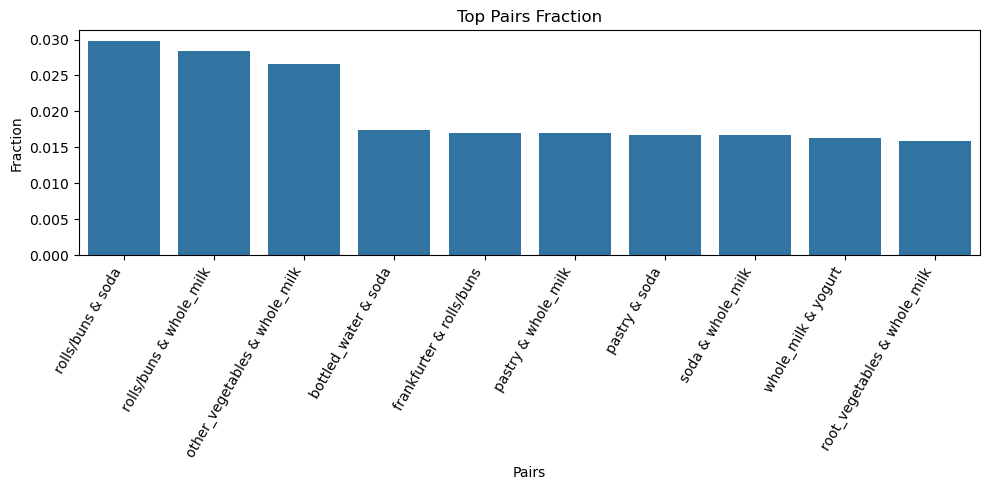

In [1001]:
#create top pair fraction graph

#extract top k pairs fraction
p_frac_K = sorted(frac_pair.items(), key=lambda x: (-x[1], x[0]))[:K]
pairs_df = pd.DataFrame(p_frac_K, columns=["Pairs", "Fraction"])
pairs_df["Pairs"] = pairs_df["Pairs"].apply(lambda x: f"{x[0]} & {x[1]}")

#plot
plt.figure(figsize=(10,5))
sns.barplot(data=pairs_df, x="Pairs", y="Fraction")
plt.xlabel('Pairs')
plt.ylabel('Fraction')
plt.title('Top Pairs Fraction')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [1002]:
#count items for items frequency graph
item_counts = Counter()

items = np.hstack(data["items"]).tolist()

item_counts.update(items)


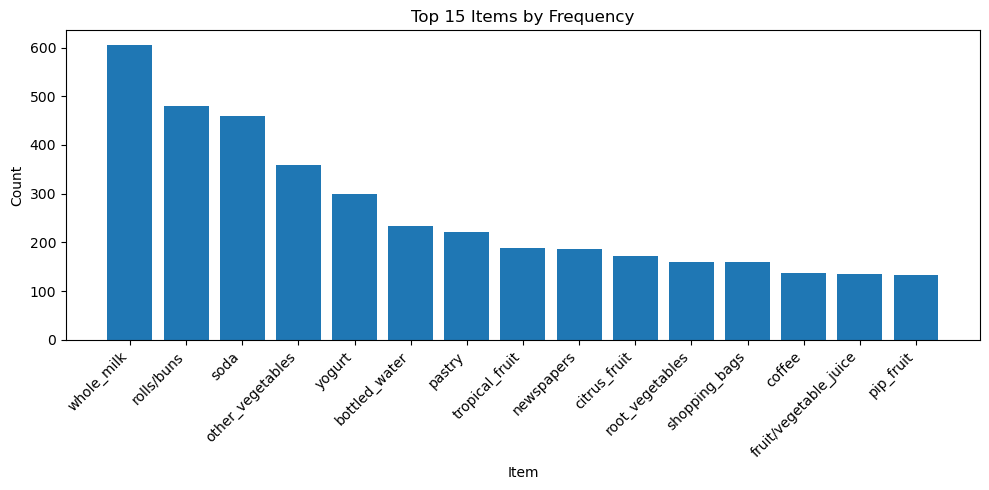

In [1003]:
#extract top k
top_items = item_counts.most_common(15)
labels, counts = zip(*top_items)

#plot
plt.figure(figsize=(10, 5))
plt.bar(labels, counts)
plt.xticks(rotation=45, ha='right')
plt.title(f"Top 15 Items by Frequency")
plt.ylabel("Count")
plt.xlabel("Item")
plt.tight_layout()
plt.show()

In [1004]:
# extract top 25 for co-occurrence matrix 
top_25_i = item_counts.most_common(25)


In [1005]:
# create labels and index
top25 = [x[0] for x in top_25_i]
idx = {item:i for i, item in enumerate(top25)}
topset = set(top25)

In [1006]:
from itertools import combinations_with_replacement
#create matrix
M = np.zeros((25, 25), dtype=int)

for basket in data['items']:
    b = sorted(topset.intersection(basket))
    for a, b_ in combinations_with_replacement(b, 2):
        i, j = idx[a], idx[b_]
        if i == j:
            continue
        M[i, j] += 1
        M[j,i] += 1


cooc = pd.DataFrame(M, index=top_25_i, columns=top_25_i)

In [1007]:
#check
cooc

(whole_milk, 605)  (rolls/buns, 480)  \
(whole_milk, 605)                             0                 80   
(rolls/buns, 480)                            80                  0   
(soda, 460)                                  47                 84   
(other_vegetables, 359)                      75                 37   
(yogurt, 299)                                46                 40   
(bottled_water, 234)                         43                 33   
(pastry, 221)                                48                 32   
(tropical_fruit, 188)                        36                 24   
(newspapers, 186)                            42                 30   
(citrus_fruit, 171)                          26                 17   
(root_vegetables, 159)                       45                 11   
(shopping_bags, 159)                         21                 22   
(coffee, 138)                                25                 15   
(fruit/vegetable_juice, 136)                 20                 15   
(pip_fruit, 134)                             26                 10   
(frankfurter, 133)                           24                 48   
(brown_bread, 133)                           32                 24   
(whipped/sour_cream, 123)                    26                  8   
(chocolate, 103)                             13                 11   
(margarine, 101)                             26                 10   
(domestic_eggs, 100)                         23                 17   
(specialty_chocolate, 98)                     9                 11   
(curd, 93)                                   23                  6   
(specialty_bar, 91)                           9                 14   
(beef, 91)                                   21                 11   

                              (soda, 460)  (other_vegetables, 359)  \
(whole_milk, 605)                      47                       75   
(rolls/buns, 480)                      84                       37   
(soda, 460)                             0                       32   
(other_vegetables, 359)                32                        0   
(yogurt, 299)                          18                       36   
(bottled_water, 234)                   49                       12   
(pastry, 221)                          47                        9   
(tropical_fruit, 188)                  10                       28   
(newspapers, 186)                      15                       14   
(citrus_fruit, 171)                     9                       32   
(root_vegetables, 159)                  8                       39   
(shopping_bags, 159)                   31                       15   
(coffee, 138)                           9                        8   
(fruit/vegetable_juice, 136)           20                       11   
(pip_fruit, 134)                       13                       20   
(frankfurter, 133)                     19                       10   
(brown_bread, 133)                      7                        9   
(whipped/sour_cream, 123)               5                       21   
(chocolate, 103)                       20                       10   
(margarine, 101)                        9                       13   
(domestic_eggs, 100)                    9                       10   
(specialty_chocolate, 98)              19                        3   
(curd, 93)                              8                        6   
(specialty_bar, 91)                    25                        5   
(beef, 91)                              5                       24   

                              (yogurt, 299)  (bottled_water, 234)  \
(whole_milk, 605)                        46                    43   
(rolls/buns, 480)                        40                    33   
(soda, 460)                              18                    49   
(other_vegetables, 359)                  36                    12   
(yogurt, 299)                             0

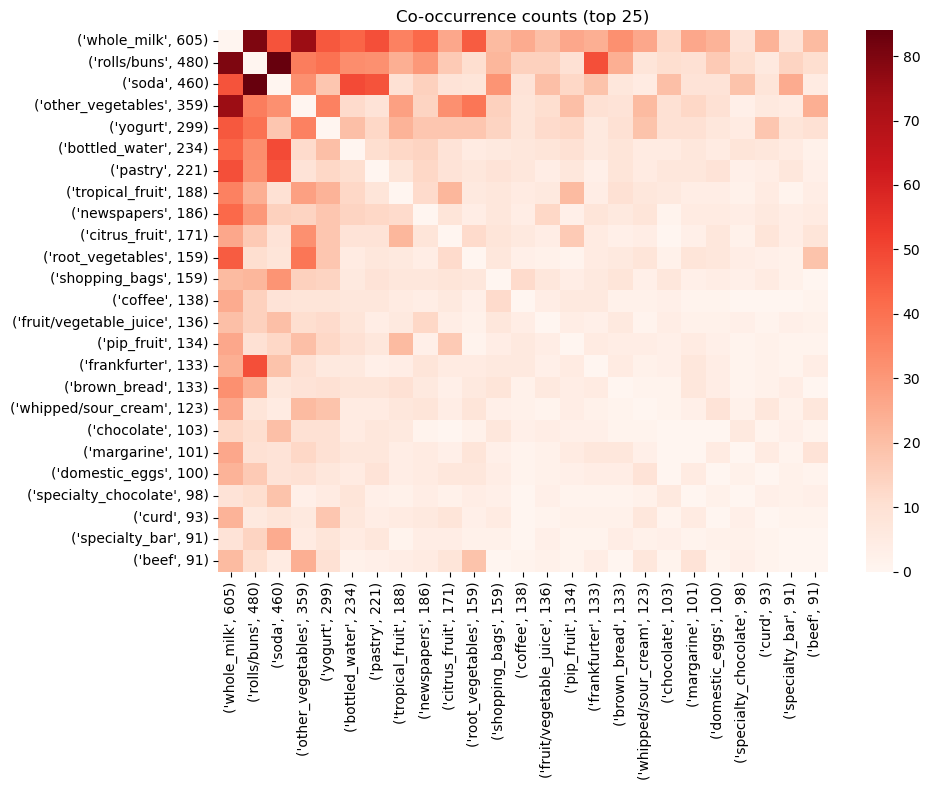

In [1008]:
#plot
plt.figure(figsize=(10, 8))
sns.heatmap(cooc, cmap='Reds')
plt.title("Co-occurrence counts (top 25)")
plt.tight_layout()
plt.show()

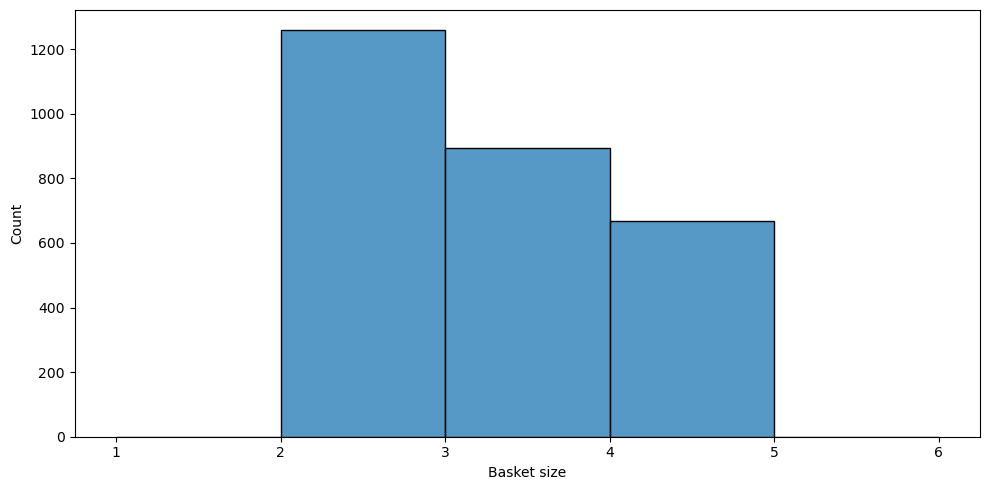

In [1009]:
#plot basket size using previous stored basket_size 
plt.figure(figsize = (10,5))
sns.histplot(data = basket_size,bins=np.arange(1,7))
plt.xlabel('Basket size')
plt.ylabel('Count')
plt.tight_layout()

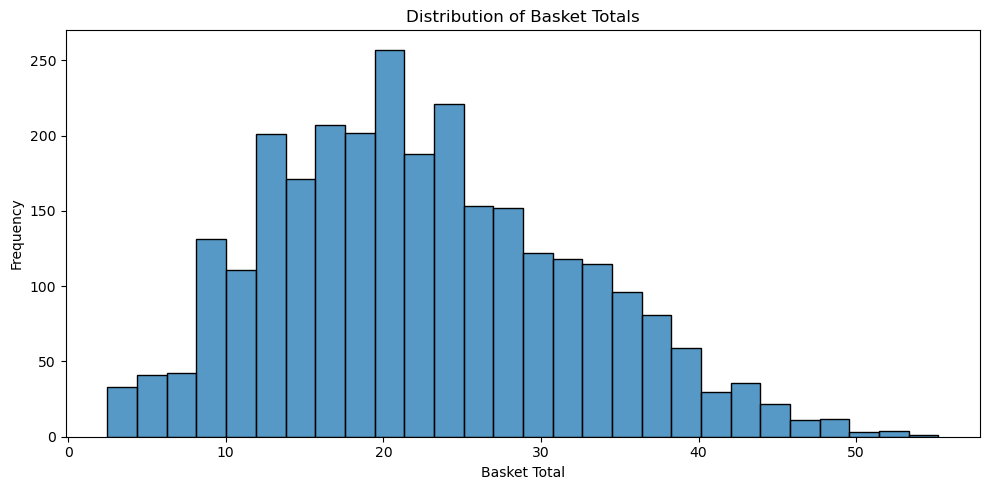

In [1010]:
#plot basket_total using data['basket_total']
plt.figure(figsize=(10,5))
sns.histplot(data['basket_total'])
plt.xlabel('Basket Total')
plt.ylabel('Frequency')
plt.title('Distribution of Basket Totals')
plt.tight_layout()

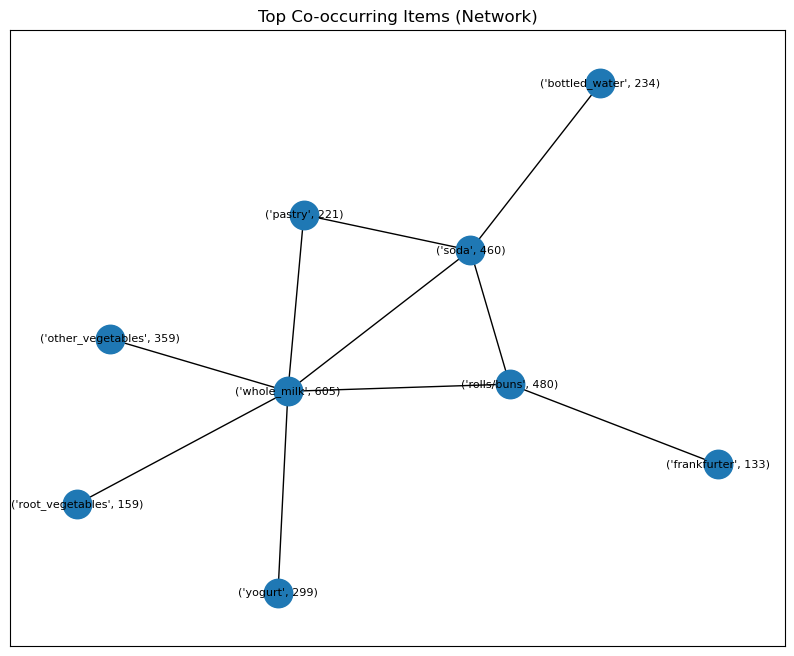

In [1011]:
#extract labels and edges for network grpah
W = cooc.values.astype(float)

labels = cooc.index.tolist()

tri = np.triu_indices_from(W, k=1)

edges = [(labels[i], labels[j], W[i, j]) for i, j in zip(*tri) if W[i, j] > 0]

edges.sort(key=lambda x: x[2], reverse=True)
edges = edges[:K]

#plot graph|
G = nx.Graph()
G.add_weighted_edges_from(edges)                                 

pos = nx.spring_layout(G, seed=RANDOMSEED)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=420)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos)
plt.title("Top Co-occurring Items (Network)")
plt.show()

In [1012]:
#count individual items for association rules 
ind_counts = Counter()
def counts(row):
    ind = list(combinations(sorted(set(row)),1))
    ind_counts.update(ind)

data['items'].map(counts, na_action = "ignore")
ind_counts

Counter({('whole_milk',): 605,
         ('rolls/buns',): 480,
         ('soda',): 460,
         ('other_vegetables',): 359,
         ('yogurt',): 299,
         ('bottled_water',): 234,
         ('pastry',): 221,
         ('tropical_fruit',): 188,
         ('newspapers',): 186,
         ('citrus_fruit',): 171,
         ('root_vegetables',): 159,
         ('shopping_bags',): 159,
         ('coffee',): 138,
         ('fruit/vegetable_juice',): 136,
         ('pip_fruit',): 134,
         ('frankfurter',): 133,
         ('brown_bread',): 133,
         ('whipped/sour_cream',): 123,
         ('chocolate',): 103,
         ('margarine',): 101,
         ('domestic_eggs',): 100,
         ('specialty_chocolate',): 98,
         ('curd',): 93,
         ('specialty_bar',): 91,
         ('beef',): 91,
         ('napkins',): 90,
         ('butter',): 84,
         ('long_life_bakery_product',): 81,
         ('cream_cheese',): 78,
         ('waffles',): 76,
         ('chicken',): 75,
         ('beverages

In [1013]:
#calculate individual fraction from ind_counts
ind_frac = [{i:num/len(data)}for i,num in ind_counts.items()]
ind_frac

[{('citrus_fruit',): 0.06063829787234042},
 {('margarine',): 0.035815602836879436},
 {('ready_soups',): 0.0003546099290780142},
 {('semi-finished_bread',): 0.009929078014184398},
 {('coffee',): 0.04893617021276596},
 {('tropical_fruit',): 0.06666666666666667},
 {('yogurt',): 0.10602836879432624},
 {('cream_cheese',): 0.027659574468085105},
 {('meat_spreads',): 0.00425531914893617},
 {('pip_fruit',): 0.0475177304964539},
 {('condensed_milk',): 0.009219858156028368},
 {('long_life_bakery_product',): 0.02872340425531915},
 {('other_vegetables',): 0.12730496453900708},
 {('whole_milk',): 0.21453900709219859},
 {('cereals',): 0.003900709219858156},
 {('frankfurter',): 0.047163120567375885},
 {('rolls/buns',): 0.1702127659574468},
 {('soda',): 0.16312056737588654},
 {('chicken',): 0.026595744680851064},
 {('butter',): 0.029787234042553193},
 {('fruit/vegetable_juice',): 0.04822695035460993},
 {('newspapers',): 0.06595744680851064},
 {('sugar',): 0.018085106382978722},
 {('butter_milk',): 0.0

In [1014]:
#calculate support
support_A = (
    pd.Series({k[0]: v for d in ind_frac for k, v in d.items()})
      .sort_index()
)

#filter out noise and unwanted values
support_A = support_A[support_A >= 0.01]

In [1018]:
#calculate supportAB from support_A and frac_pair
itemss = support_A.index.tolist()
idx = {item:i for i,item in enumerate(itemss)}
S = np.zeros((len(itemss), len(itemss)), float)

for (a,b), s in frac_pair.items():  
    pair_count = pair_counts.get((a, b), 0)
    if a in idx and b in idx and pair_count >= 5:
        i, j = idx[a], idx[b]
        S[i, j] = s
        S[j, i] = s               

support_AB = pd.DataFrame(S, index=itemss, columns=itemss)
support_AB

beef   berries  beverages  bottled_water  \
beef                      0.000000  0.000000   0.000000       0.000000   
berries                   0.000000  0.000000   0.000000       0.000000   
beverages                 0.000000  0.000000   0.000000       0.002837   
bottled_water             0.000000  0.000000   0.002837       0.000000   
brown_bread               0.000000  0.000000   0.000000       0.002837   
butter                    0.000000  0.000000   0.000000       0.000000   
butter_milk               0.000000  0.000000   0.000000       0.000000   
candy                     0.000000  0.000000   0.000000       0.000000   
cat_food                  0.000000  0.000000   0.000000       0.000000   
chewing_gum               0.000000  0.000000   0.000000       0.002128   
chicken                   0.000000  0.000000   0.000000       0.001773   
chocolate                 0.000000  0.000000   0.000000       0.001773   
citrus_fruit              0.002837  0.000000   0.000000       0.003191   
coffee                    0.000000  0.000000   0.000000       0.002482   
cream_cheese              0.000000  0.000000   0.000000       0.000000   
curd                      0.000000  0.000000   0.000000       0.002482   
dessert                   0.000000  0.000000   0.000000       0.002482   
detergent                 0.000000  0.000000   0.000000       0.000000   
dishes                    0.000000  0.000000   0.000000       0.000000   
domestic_eggs             0.000000  0.000000   0.000000       0.001773   
frankfurter               0.000000  0.000000   0.000000       0.002128   
frozen_meals              0.000000  0.000000   0.000000       0.000000   
frozen_vegetables         0.000000  0.000000   0.000000       0.001773   
fruit/vegetable_juice     0.000000  0.000000   0.000000       0.002837   
grapes                    0.000000  0.000000   0.000000       0.000000   
hard_cheese               0.000000  0.000000   0.000000       0.000000   
hygiene_articles          0.000000  0.000000   0.000000       0.000000   
ice_cream                 0.000000  0.000000   0.000000       0.001773   
long_life_bakery_product  0.000000  0.000000   0.002128       0.000000   
margarine                 0.003191  0.000000   0.000000       0.002482   
meat                      0.000000  0.000000   0.000000       0.000000   
misc._beverages           0.000000  0.000000   0.000000       0.002482   
napkins                   0.000000  0.000000   0.000000       0.002837   
newspapers                0.001773  0.000000   0.001773       0.004965   
oil                       0.000000  0.000000   0.000000       0.000000   
onions                    0.000000  0.000000   0.000000       0.000000   
other_vegetables          0.008511  0.002482   0.000000       0.004255   
pastry                    0.000000  0.000000   0.002837       0.003901   
photo/film                0.000000  0.000000   0.000000       0.000000   
pip_fruit                 0.000000  0.000000   0.000000       0.003546   
pot_plants                0.000000  0.000000   0.000000       0.000000   
rolls/buns                0.003901  0.000000   0.004965       0.011702   
root_vegetables           0.006738  0.000000   0.000000       0.001773   
salty_snack               0.000000  0.000000   0.000000       0.000000   
seasonal_products         0.000000  0.000000   0.000000       0.000000   
shopping_bags             0.000000  0.000000   0.000000       0.002128   
soda                      0.001773  0.002128   0.003191       0.017376   
specialty_bar             0.000000  0.000000   0.001773       0.001773   
specialty_chocolate       0.000000  0.000000   0.000000       0.002837   
sugar                     0.000000  0.000000   0.000000       0.000000   
tropical_fruit            0.000000  0.000000   0.000000       0.004610   
uht-milk                  0.000000  0.000000   0.000000       0.003546   
waffles                   0.000000  0.000000   0.000000       0.000000   
whipped/sour_cream        0.002482

In [1019]:
#Calculate confidence and lift from support_AB
Confidence = support_AB.div(support_A, axis=0).fillna(0.0)
np.fill_diagonal(Confidence.values, 0.0)

Lift = Confidence.div(support_A, axis=1).fillna(0.0)
np.fill_diagonal(Lift.values, 0.0)


In [1020]:
#extract top_K conf and lift
top_conf = (Confidence.stack()
            .sort_values(ascending=False)
            .head(K))

top_lift = (Lift.stack()
            .sort_values(ascending=False)
            .head(K))


In [1021]:
top_conf

frankfurter        rolls/buns            0.360902
sugar              whole_milk            0.294118
berries            yogurt                0.293103
root_vegetables    whole_milk            0.283019
meat               whole_milk            0.282609
frozen_vegetables  whole_milk            0.281690
specialty_bar      soda                  0.274725
beef               other_vegetables      0.263736
berries            whipped/sour_cream    0.258621
margarine          whole_milk            0.257426
dtype: float64

In [1022]:
top_lift

whipped/sour_cream  berries               5.929352
berries             whipped/sour_cream    5.929352
napkins             dishes                5.529412
dishes              napkins               5.529412
hygiene_articles    napkins               4.217949
napkins             hygiene_articles      4.217949
cream_cheese        butter_milk           4.017094
butter_milk         cream_cheese          4.017094
seasonal_products   shopping_bags         3.834778
shopping_bags       seasonal_products     3.834778
dtype: float64

In [1024]:
#half-finished revenue scenarios
#FINISHED:: randomly perturb prices (±10%) and simulate effects on basket totals
data['1_price_mod'] = data['item_1_price']*rng.uniform(0.9, 1.1, size=len(data))
data['2_price_mod'] = data['item_2_price']*rng.uniform(0.9, 1.1, size=len(data))
data['3_price_mod'] = data['item_3_price']*rng.uniform(0.9, 1.1, size=len(data))
data['4_price_mod'] = data['item_4_price']*rng.uniform(0.9, 1.1, size=len(data))

In [1025]:
cols = ['1_price_mod', '2_price_mod', '3_price_mod', '4_price_mod']
data['basket_total_mod'] = data[cols].sum(axis=1, skipna=True)

In [1030]:
data['basket_change'] = data['basket_total_mod']/data['basket_total']

In [1031]:
#final checkpoint
data

item_1                    item_2            item_3  \
0                 citrus_fruit                 margarine       ready_soups   
1                       coffee            tropical_fruit            yogurt   
2                 cream_cheese              meat_spreads         pip_fruit   
3               condensed_milk  long_life_bakery_product  other_vegetables   
4                      cereals                whole_milk              <NA>   
...                        ...                       ...               ...   
2815                newspapers                    pastry              <NA>   
2816             bottled_water                      curd        whole_milk   
2817             bottled_water              frozen_meals        whole_milk   
2818  long_life_bakery_product                    yogurt              <NA>   
2819                 ice_cream  long_life_bakery_product     specialty_bar   

                   item_4  basket_size  item_1_price  item_2_price  \
0     semi-finished_bread            4         11.72          6.86   
1                    <NA>            3          1.87         14.65   
2                  yogurt            4         11.90          2.36   
3              whole_milk            4          5.88         13.94   
4                    <NA>            2          6.93         12.43   
...                   ...          ...           ...           ...   
2815                 <NA>            2          5.64         11.79   
2816                 <NA>            3          7.27          3.25   
2817               yogurt            4          7.27          7.40   
2818                 <NA>            2         13.94         11.54   
2819  specialty_chocolate            4          2.53         13.94   

      item_3_price  item_4_price  basket_total  \
0            12.95         10.61         42.14   
1            11.54           NaN         28.06   
2             7.03         11.54         32.83   
3             9.84         12.43         42.09   
4              NaN           NaN         19.36   
...            ...           ...           ...   
2815           NaN           NaN         17.43   
2816         12.43           NaN         22.95   
2817         12.43         11.54         38.64   
2818           NaN           NaN         25.48   
2819          1.14          4.58         22.19   

                                                  items  \
0     [citrus_fruit, margarine, ready_soups, semi-fi...   
1                      [coffee, tropical_fruit, yogurt]   
2       [cream_cheese, meat_spreads, pip_fruit, yogurt]   
3     [condensed_milk, long_life_bakery_product, oth...   
4                                 [cereals, whole_milk]   
...                                                 ...   
2815                               [newspapers, pastry]   
2816                  [bottled_water, curd, whole_milk]   
2817  [bottled_water, frozen_meals, whole_milk, yogurt]   
2818                 [long_life_bakery_product, yogurt]   
2819  [ice_cream, long_life_bakery_product, specialt...   

                                                  pairs  \
0     [(citrus_fruit, margarine), (citrus_fruit, rea...   
1     [(coffee, tropical_fruit), (coffee, yogurt), (...   
2     [(cream_cheese, meat_spreads), (cream_cheese, ...   
3     [(condensed_milk, long_life_bakery_product), (...   
4                               [(cereals, whole_milk)]   
...                                                 ...   
2815                             [(newspapers, pastry)]   
2816  [(bottled_water, curd), (bottled_water, whole_...   
2817  [(bottled_water, frozen_meals), (bottled_water...   
2818               [(long_life_bakery_product, yogurt)]   
2819  [(ice_cream, long_life_bakery_product), (ice_c...   

                                                triples  1_price_mod  \
0     [(citrus_fruit, margarine, ready_soups), (citr...    12.504737   
1                    [(coffee, tropical_fruit, yogurt)]     1.742407   
2     [(cre